Cities closest to Airport A {(0.2585888284347584, 1.126602912710594), (0.14973226082993213, 1.1469353105398257), (0.2821784712291018, 1.1332518011964892), (0.10464798401590414, 1.1216281186936221), (0.24727058745161676, 0.7671334185710084), (0.2645003855811857, 0.8106408839406475), (0.0981122220496845, 1.0359293778822507), (0.1835023073497839, 0.9670818405281695), (0.018427779700225605, 0.9232526935962116), (0.014051478226979719, 0.7852579043126711), (0.2280092872509229, 1.0499775359947243), (0.023253390728829954, 0.9637740778408174), (0.3899598882727857, 1.0203782539664004), (0.37195169396406036, 1.0442955273237913), (0.22922369671638818, 0.7198534516964983), (0.3312040494600937, 0.9157637583943052), (0.10833979820425965, 1.0954972107950214), (0.08614017050593482, 0.8137997970516283)}


Cities closest to Airport B {(0.3583066553049129, 0.2646903954886014), (0.45783055739940914, 0.26331453731804266), (0.33016385309280927, 0.15528412400260994), (0.28075500284988525, 0.35784109891180904)

<module 'matplotlib.pyplot' from '/Users/michaelching/PycharmProjects/CECS 451/Assignment #5/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

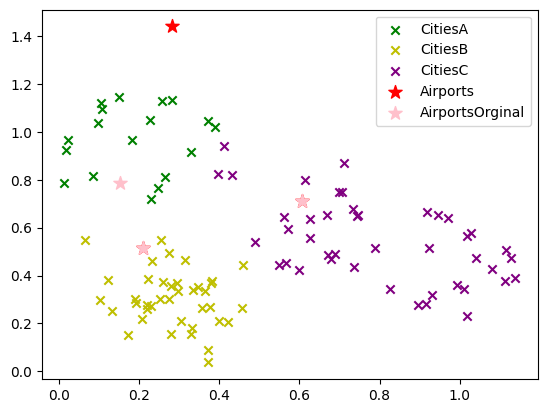

In [21]:
import math
import random
import numpy as np


def findClosestCity(airports, cityA, cityB, cityC):

    #Empty sets
    cityA.clear()
    cityB.clear()
    cityC.clear()

    #For all cities
    for city in cities:

        cityXCord = city[0]
        cityYCord = city[1]
        distance = 100000000
        airportNum = -1

        #For each airport see which is closest to city
        for i in range (num_air):

            airportXCord = airports[i][0]
            airportYCord = airports[i][1]

            #Distance formula
            tempCal = math.sqrt( (airportXCord - cityXCord)**2 + (airportYCord - cityYCord)**2 )

            #Found an airport closer to city
            if(tempCal < distance):
                distance = tempCal
                airportNum = i


        if(airportNum == 0):
            cityA.add(city)

        if(airportNum == 1):
            cityB.add(city)

        if(airportNum == 2):
            cityC.add(city)



num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y))



#Create set of cities for closest airport
cityA = set()
cityB =  set()
cityC = set()

findClosestCity(airports, cityA, cityB, cityC)




temp1 = airports[0]
temp2 = airports[1]
temp3 = airports[2]
airportOrgin = []
airportOrgin.append(temp1)
airportOrgin.append(temp2)
airportOrgin.append(temp3)

print("Cities closest to Airport A" , cityA)
print()
print()
print("Cities closest to Airport B" , cityB)
print()
print()
print("Cities closest to Airport C" , cityC)
print()
print()
#print (cities)
#print (airports)

change = 10

#Repeat objective function
#while (change < 0.5):
for i in range(1):

    #Find/update the cities closest to an airport
    findClosestCity(airports, cityA, cityB, cityC)

    #Airport A
    airportX = airports[0][0]
    airportY = airports[0][1]
    x = 0
    y = 0


    for city in cityA:
        x = x + (airportX - city[0])
        y = y + (airportY - city[1])
        print('x' , x)
        print('y' , y)

    x = x * 2
    y = y * 2

    print('x' , x)
    print('airport x cord', airports[0][0])


    gradX = airports[0][0] - (sigma * x)
    gradY = airports[0][1] - (sigma * y)
    print ('gradX', gradX)

    airports[0] = (gradX,gradY)
    print("airport0", airports[0])




print("testing optimal",airports)

#airports[1] = (0,0)
#airports[2] = (0,0)

f = x + y

print ("Optimal objective function: ", f)


#Implement gradient
#for i in range(num_air):

 #   airportX = airports[i][0]
  #  airportY = airports[i][1]

   # x = 0
    #y = 0

   # for city in cities:
   #     x = x + (airportX - city[0])**2
   #     y = y + (airportY - city[1])**2


   # x = airports[i][0] - (sigma * x)
   # y = airports[i][1] - (sigma * y)
   # airports[i] = (x,y)



print ('airport cords', airports)

print('cityA: ', cityA)
print('cityB: ', cityB)
print('cityC: ', cityC)

import matplotlib.pyplot as plt

zip_citiesA = zip(*cityA)
plt.scatter(*zip_citiesA, marker='x',color='green', label='CitiesA')

zip_citiesB = zip(*cityB)
plt.scatter(*zip_citiesB, marker='x',color='y', label='CitiesB')

zip_citiesC = zip(*cityC)
plt.scatter(*zip_citiesC, marker='x',color='purple', label='CitiesC')

#zip_cities = zip(*cities)
#plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')

zip_airsOrgin = zip(*airportOrgin)
plt.scatter(*zip_airsOrgin, marker='*', color='pink', s=100, label='AirportsOrginal')

plt.legend()
plt